In [1]:
## Data from 
# https://archive.ics.uci.edu/dataset/109/wine

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
wine_metrics = wine.data.features 
wine_cluster = wine.data.targets 

In [2]:
## checking the wine data
wine_metrics.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


- Here we already have clusters of the dataset, but just take only the input data and try to make clustering 

## Clustering Algorithms

- We are using the entire dataset since the goal is to categorize the data into clusters rather than perform predictive testing.
- Only two features are considered here for visualization purposes — with more than two, the clusters become difficult to interpret visually. However, the same steps apply regardless of the number of features used.

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Converting all feature values to a common scale because the Euclidean distance 
# is sensitive to differences in feature scales, which would also affect the cost function.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
number_of_clusters = 3

selected_cols = ['Alcohol','Nonflavanoid_phenols']
wine_metrics_df = scaler.fit_transform(wine_metrics[selected_cols])
wine_metrics_df = pd.DataFrame(np.round(wine_metrics_df, 2), columns=selected_cols)
wine_metrics_df.head()

,Alcohol,Nonflavanoid_phenols
0,0.84,0.28
1,0.57,0.25
2,0.56,0.32
3,0.88,0.21
4,0.58,0.49


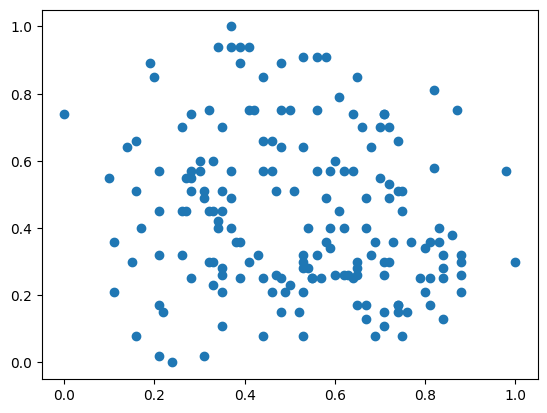

In [4]:
plt.scatter(wine_metrics_df.Alcohol,wine_metrics_df.Nonflavanoid_phenols)
plt.show()

In [5]:
# Plotting the outputs of K-Means, Mini-Batch K-Means, and K-Means++

def plot_clusters(data,centers,clusters,title = ''):

    plt.figure(figsize=(8,6))

    # Unique clusters and colors
    unique_clusters = np.unique(clusters)
    colors_dark = plt.cm.Dark2(np.linspace(0, 1, len(unique_clusters))) 

    for color_index, cluster in enumerate(unique_clusters):

        mask = clusters == cluster
        cluster_points = data[mask]
        
        # Plotting all clusters in a loop, assigning a unique color to each for better visualization
        plt.scatter(cluster_points['Alcohol'], cluster_points['Nonflavanoid_phenols'], 
                    color=colors_dark[color_index], label=f'Cluster {cluster}'
                    )
        

        # Plot centroid with cross marker and darker color
        plt.scatter(
            centers[color_index, 0], 
            centers[color_index, 1], 
            color=colors_dark[color_index], 
            marker='X', 
            s=150, 
            edgecolor='black', 
            linewidth=1.5, 
            label=f'Centroid {cluster}'
            
        )

        # Draw a circle around centroid
        circle = plt.Circle(
            (centers[color_index, 0], centers[color_index, 1]), 
            radius=0.2, 
            color=colors_dark[color_index],
            fill = False
        )
        plt.gca().add_patch(circle)

    plt.xlabel('Alcohol')
    plt.ylabel('Nonflavanoid_phenols')
    plt.title(title)
    plt.legend()
    plt.show()

    

### Manual Implementation of KMeans Algorithm

In [6]:
## Selecting random initial centers
sample_centers = wine_metrics_df.sample(n=number_of_clusters).values.tolist()
sample_centers

[[0.3, 0.6], [0.75, 0.51], [0.58, 0.91]]

In [7]:

import importlib
import kmeans

# reload the whole module
importlib.reload(kmeans)
from kmeans import ManualKMeans

manual_kmeans_algo = ManualKMeans(n_clusters = number_of_clusters, data = wine_metrics_df)
manual_kmeans_algo.initialise_centers(sample_centers)
manual_kmeans_inertia,manual_kmeans_centers,manual_kmeans_clusters = manual_kmeans_algo.assign_clusters()

manual_kmeans_centers,manual_kmeans_inertia

(array([[0.28222222, 0.38425926],
        [0.68448718, 0.29166667],
        [0.51456522, 0.74891304]]),
 6.39)

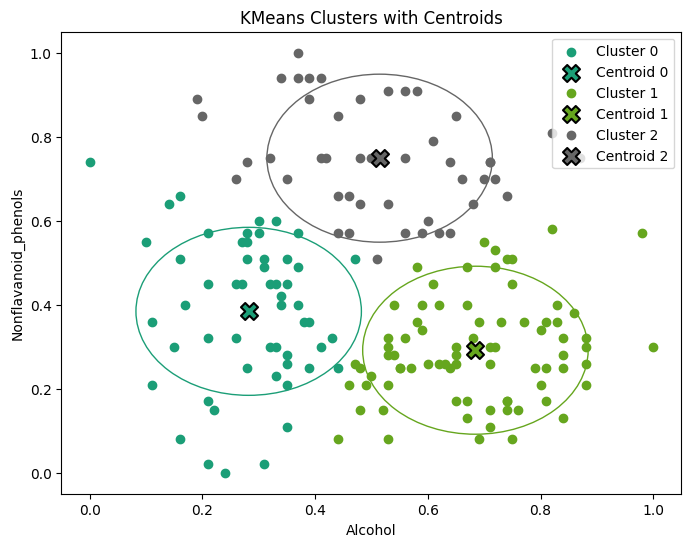

In [8]:
plot_clusters(wine_metrics_df,manual_kmeans_centers,manual_kmeans_clusters , 
              'KMeans Clusters with Centroids')

### Scikit Learn KMeans Module

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
scikit_kmeans_clusters = kmeans.fit_predict(wine_metrics_df)
scikit_kmeans_centers = kmeans.cluster_centers_
scikit_kmeans_inertia = kmeans.inertia_
scikit_kmeans_centers,scikit_kmeans_inertia

(array([[0.31173077, 0.32076923],
        [0.47309091, 0.72563636],
        [0.70521127, 0.30084507]]),
 6.414361861026297)

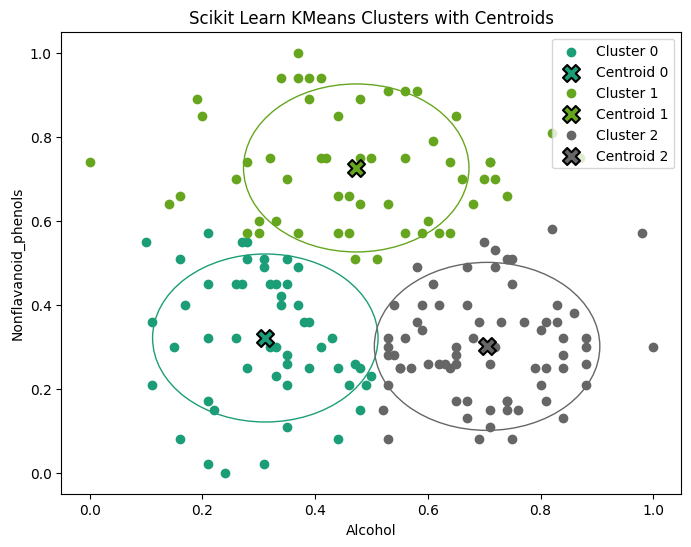

In [10]:
plot_clusters(wine_metrics_df,scikit_kmeans_centers,scikit_kmeans_clusters,"Scikit Learn KMeans Clusters with Centroids")

### Manual Implementation of  Mini-Batch KMeans Algorithm

In [11]:
sample_centers = wine_metrics_df.sample(n=number_of_clusters).values.tolist()

manual_mbkmeans_algo = ManualKMeans(n_clusters = number_of_clusters, data = wine_metrics_df)
manual_mbkmeans_algo.initialise_centers(sample_centers)

manual_mbkmeans_inertia,manual_mbkmeans_centers,\
    manual_mbkmeans_clusters = manual_kmeans_algo.assign_clusters(max_iterations = 50,batch_size = 50)

manual_mbkmeans_centers,manual_mbkmeans_inertia

(array([[0.29176471, 0.40823529],
        [0.66681818, 0.31681818],
        [0.56727273, 0.70363636]]),
 1.82)

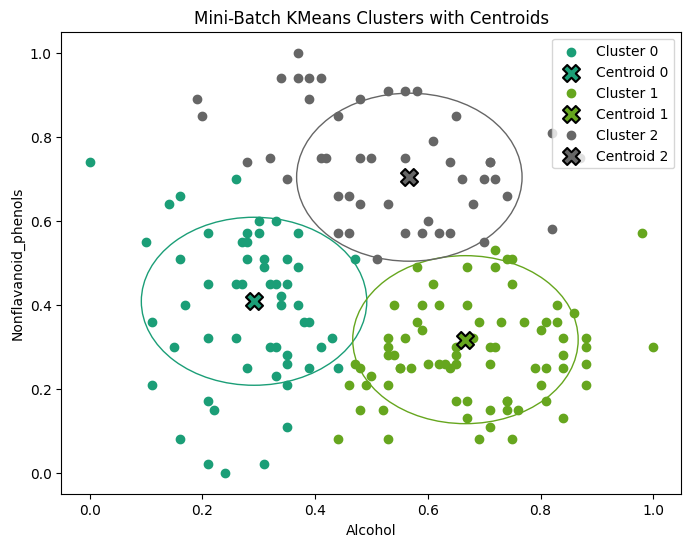

In [12]:
plot_clusters(wine_metrics_df,manual_mbkmeans_centers,manual_mbkmeans_clusters,
              "Mini-Batch KMeans Clusters with Centroids"
              )

### Scikit Learn Mini-Batch KMeans Module

In [13]:
from sklearn.cluster import MiniBatchKMeans

mbkmeans = MiniBatchKMeans(n_clusters=number_of_clusters, batch_size=50,random_state=42)
scikit_mbkmeans_clusters = mbkmeans.fit_predict(wine_metrics_df)
scikit_mbkmeans_centers = mbkmeans.cluster_centers_
scikit_mbkmeans_inertia = mbkmeans.inertia_
scikit_mbkmeans_centers,scikit_mbkmeans_inertia

(array([[0.71222656, 0.30683594],
        [0.32308756, 0.33262673],
        [0.47903955, 0.74514124]]),
 6.437025095379896)

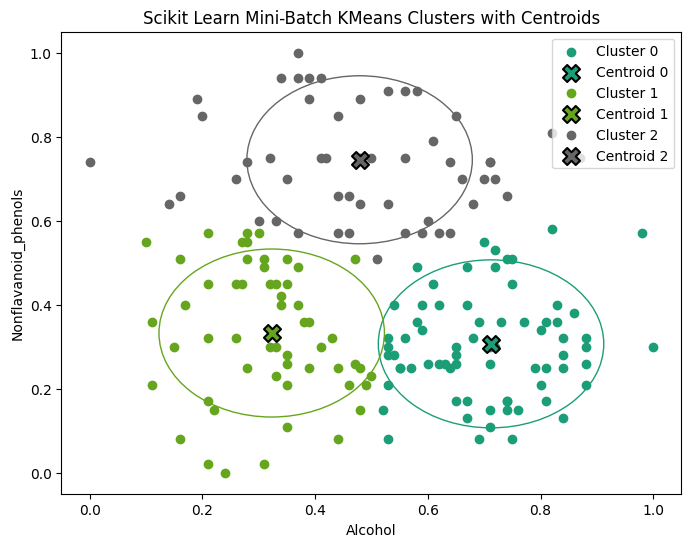

In [14]:
plot_clusters(wine_metrics_df,scikit_mbkmeans_centers,scikit_mbkmeans_clusters,
              "Scikit Learn Mini-Batch KMeans Clusters with Centroids"
              )

### Manual Implementation of  K++Means Algorithm

In [15]:
# reload the whole module
import kppmeans
importlib.reload(kppmeans)
from kppmeans import KPPMeans

manual_kppmeans_algo = KPPMeans(n_clusters = number_of_clusters, data = wine_metrics_df)
manual_kppmeans_inertia,manual_kppmeans_centers,manual_kppmeans_clusters = manual_kppmeans_algo.assign_clusters()

manual_kppmeans_centers,manual_kppmeans_inertia

(array([[0.28945455, 0.36127273],
        [0.69648649, 0.29662162],
        [0.50693878, 0.73734694]]),
 6.4)

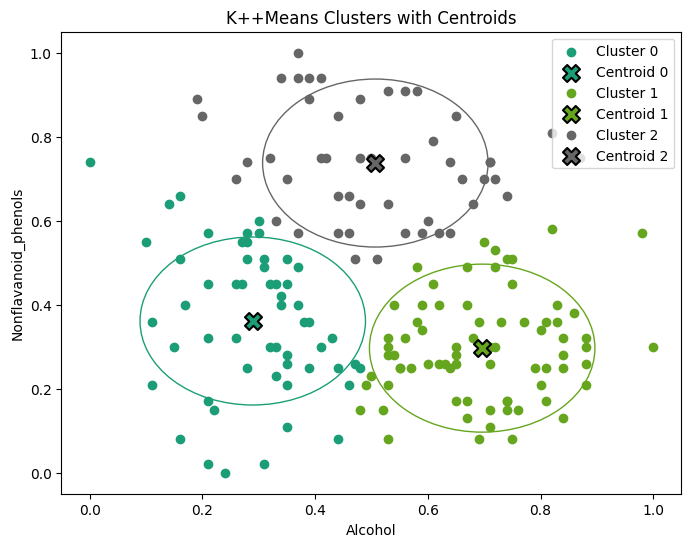

In [16]:
plot_clusters(wine_metrics_df,manual_kppmeans_centers,manual_kppmeans_clusters,
              "K++Means Clusters with Centroids"
              )

### Scikit Learn K++Means Module

In [17]:
from sklearn.cluster import KMeans

kppmeans = KMeans(n_clusters=number_of_clusters,init='k-means++',random_state=42)
scikit_kppmeans_clusters = kppmeans.fit_predict(wine_metrics_df)
scikit_kppmeans_centers = kppmeans.cluster_centers_
scikit_kppmeans_inertia = kppmeans.inertia_
scikit_kppmeans_centers,scikit_kppmeans_inertia

(array([[0.31173077, 0.32076923],
        [0.47309091, 0.72563636],
        [0.70521127, 0.30084507]]),
 6.414361861026297)

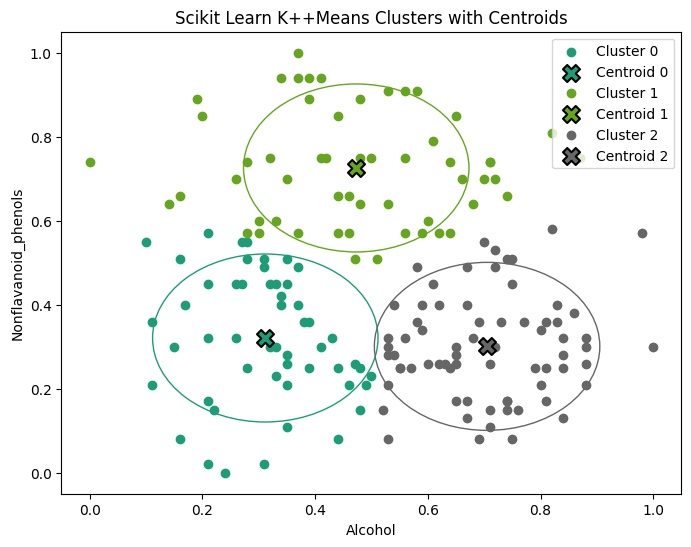

In [18]:
plot_clusters(wine_metrics_df,scikit_kppmeans_centers,scikit_kppmeans_clusters,
              "Scikit Learn K++Means Clusters with Centroids"
              )